****
<a id='lesson-3'></a>
# Lesson-3:  Integration
****

Computing integrals (numerically) is an important task in many computational fields. In this tutorial we will explore two schemes: 
- finite difference schemes / grid schemes
- Monte Carlo scheme

Scipy has 'integrate' function: learn its usage to compuate the 'exact' value of the integral


## Grid schemes
Typically used for 1-D or 2-D integrals, by evaluating the value of the function on a regular grid and then using approximation schemes like 'trapezoidal rule'

## Task-1
Following are the sub-tasks
- Write a function that takes as input a *function* and interval, and returns the value of the integral. Assume the fuction to be one-dimensional function
- Using the above function, find the area of a unit circle



## Task-2
 Exploratory task: Adaptive grid size. When the function changes 'too fast', then next grid point is 'closer' (and change is 'too slow', then next grid point is 'farther'). Using thisi adaptive scheme compute the area of unit circle.



## Monte Carlo methods
Monte Carlo methods are typically used when we have very large dimensional integrals.

## Task-3: Compute the area of the quarter unit circle (1st quadrant)  using <span style='color:red'> simple </span> Monte Carlo method


## Task-4 
Simple Monte Carlo is almost never used; here is the 'theory' for a more proper usage...

Let us consider an integral:
$$ I = \int_a^b f(x)~dx$$
where $x\in \mathcal{R}^N$. Such multi-dimensional integrals occur in physics, chemistry, all branches of engineering, and one standard technique is to use Monte Carlo sampling. Below is a rather short presenation of connection between sampling and such integrals

### Multi-dimensional integrals using Monte Carlo sampling

$$I = \int_a^b dx~f(x) = \int_a^b dx~\rho(x) \left( \frac{f(x)}{\rho(x)}\right) =\int_a^b \rho(x)~g(x)~dx $$
with the restriction that $\rho(x)\ne0\forall x\in[a,b]$, and $g(x)={f(x)}/{\rho(x)}$.  

When the fuction $\rho(x)$ statisfies the following conditions:
1. $\rho(x) \ge 0~\forall~x\in[a,b]$
2. $\int_a^b dx~\rho(x) = 1$

such a function can be considered a probability density function. 

When $\rho(x)$ is a probability density function, 
$$ I = \int_a^b \rho(x)~g(x)~dx = \mathbb{E}_{x\sim\rho}~g(x)= \text{average value of } g(x) \text{ with } x \text{ sampled with probability density }\rho(x)$$
The power of the Monte Carlo method comes from the flexibility in the choice of $\rho(x)$. If $\rho(x)$ is so chosen that it is also large when $|f(x)|$ is large and $\rho(x)$ is small when $|f(x)|$ is small, the efficiency of computing the integral is great. In a proper statistics course, this is demostrated by showing that the variance of computation decreases; this will not be attempted here. The 'Monte Carlo' in the name comes from the fact that random sampling of $x$ with probability density $\rho(x)$; gambling in casinos rely heavily on random numbers.

### Task 4.1: Compute area of circle with $\rho(x)=\text{constant}$



### Task 4.2: Compute the are of the circle with $\rho(x)$ being the Gaussian distribution (i.e. normal distribution)



## Task-5 One simple measure of efficiency of computation

What is possible is to check that the efficiency of computation: how 'fast' is the computation? Smaller is the number of function evaluations used, greater is the efficiency. Alternatively, for the same number of function evaluations, lower error would mean greater efficiency.

Compute the graph of $N$ vs $error(N)$ where $N$ is the number of function computations, under various schemes listed below:
1. Naive Monte Carlo
2. Importance Sampling with uniform  distrituion
3. Importance Sampling with Gaussian districutuion



# Solutions

## Task 1

In [1]:
import numpy


def trapezium_area(func, a, b):
    return (b - a) * (func(a) + func(b)) / 2


# takes function, and a range (sequence of 2 numbers)
def integrate_over(func, r):
    x_vals = numpy.linspace(r[0], r[1], 100000)
    return sum(
        trapezium_area(func, x_vals[i], cur_val) for i, cur_val in enumerate(x_vals[1:])
    )


In [2]:
import math


# get points of circle above x axis
def circle_upper(x):
    if x > 1 or x < -1:
        return 0
    return math.sqrt(1 - math.pow(x, 2))


# get points of circle below x axis
def circle_lower(x):
    if x > 1 or x < -1:
        return 0
    return -math.sqrt(1 - math.pow(x, 2))


print(
    "Calculated value:",
    integrate_over(circle_upper, (-1, 1)) + integrate_over(circle_lower, (1, -1)),
)
print("Expected value:  ", math.pi)


Calculated value: 3.1415925484053173
Expected value:   3.141592653589793


Here we observe the calculated value is accurate to the expected theoretical value upto 6 decimal places (pi)

## Task 2

In [3]:
N = 100000

def dx_from_slope(slope):
    return 1 / (N * (1 + slope))


def integrate_adaptive(func, r):
    area = 0
    x = r[0]
    dx = dx_from_slope(0)
    while x < r[1]:
        area += trapezium_area(func, x, x + dx)
        dx = dx_from_slope(abs(func(x + dx) - func(x)) / dx)
        x += dx
    return area

In [4]:
print(
    "Calculated value:",
    2 * integrate_adaptive(circle_upper, (-1, 1)),
)
print("Expected value:  ", math.pi)

Calculated value: 3.141592698082412
Expected value:   3.141592653589793


In this adaptive integral scheme, we observe that the accuracy of the answer has improved over task 1 for the same value of n. The answer now is accurate upto 7 decimal places.

## Task 3

In [5]:
import random


def simple_monte_carlo_quarter_circle(n):
    count = 0
    for _ in range(n):
        x, y = random.random(), random.random()
        if math.pow(x, 2) + math.pow(y, 2) < 1:
            count += 1

    return count / n


print("Calculated value:", simple_monte_carlo_quarter_circle(1000000))
print("Expected value:  ", math.pi / 4)


Calculated value: 0.785701
Expected value:   0.7853981633974483


## Task 4

In [6]:
import random


def importance_sampling(func, probability_func, distribution_func, n):
    def g(x):
        return func(x) / distribution_func(x)

    count = 0
    for _ in range(n):
        count += g(probability_func())

    return count / n


### Task 4.1

In [7]:
def uniform_prob():
    return random.uniform(-1, 1)


def uniform_distribution(x):
    # Because range is -1 to 1 (2 units wide), each y value has to be 1 / 2
    return 0.5


print(
    "Calculated value:",
    importance_sampling(circle_upper, uniform_prob, uniform_distribution, 1000000)
    - importance_sampling(circle_lower, uniform_prob, uniform_distribution, 1000000),
)
print("Expected value:  ", math.pi)


Calculated value: 3.1424309396080274
Expected value:   3.141592653589793


### Task 4.2

In [8]:
SIGMA = 1

def gaussian_prob():
    return random.gauss(0, SIGMA)


def gaussian_distribution(x):
    return math.exp(-0.5 * math.pow(x / SIGMA, 2)) / math.sqrt(2 * math.pi)


print(
    "Calculated value:",
    importance_sampling(circle_upper, gaussian_prob, gaussian_distribution, 1000000)
    - importance_sampling(circle_lower, gaussian_prob, gaussian_distribution, 1000000),
)
print("Expected value:  ", math.pi)


Calculated value: 3.139484449031449
Expected value:   3.141592653589793


## Task 5

Text(0, 0.5, 'Error(n) %')

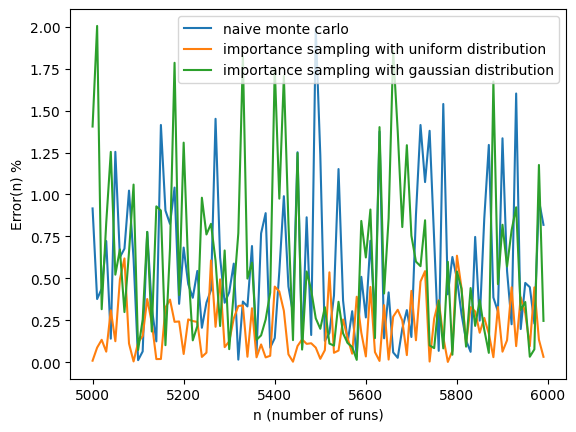

In [9]:
import matplotlib.pyplot as plt

def naive_monte_carlo(n):
    return 4 * simple_monte_carlo_quarter_circle(n)


def importance_monte_carlo_uniform(n):
    return importance_sampling(
        circle_upper, uniform_prob, uniform_distribution, n
    ) - importance_sampling(circle_lower, uniform_prob, uniform_distribution, n)


def importance_monte_carlo_gaussian(n):
    return importance_sampling(
        circle_upper, gaussian_prob, gaussian_distribution, n
    ) - importance_sampling(circle_lower, gaussian_prob, gaussian_distribution, n)

def calculate_error_percent(expected, measured):
    return abs(measured - expected) / expected * 100

x_vals = list(range(5000, 6000, 10))
a = []
b = []
c = []
for i in x_vals:
    a.append(calculate_error_percent(math.pi, naive_monte_carlo(i)))
    b.append(calculate_error_percent(math.pi, importance_monte_carlo_uniform(i)))
    c.append(calculate_error_percent(math.pi, importance_monte_carlo_gaussian(i)))


plt.plot(x_vals, a, label="naive monte carlo")
plt.plot(x_vals, b, label="importance sampling with uniform distribution")
plt.plot(x_vals, c, label="importance sampling with gaussian distribution")

plt.legend()
plt.xlabel("n (number of runs)")
plt.ylabel("Error(n) %")

From this graph we can infer that importance sampling with uniform distribution is actually more efficient than the gaussian approach in this case. However, with some tweaks to some gaussian parameters (like changing sigma - standard deviation), the gaussian approach could become more efficient. The naive monte carlo is the worst of the three.